# Discrete and Continuous Random Variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools

# Discrete Random Variables

In [42]:
class DiscreteRandomVariable:
    def __init__(self,a=0,b=1):
        self.variableType=""
        self.low=a
        self.high=b
        return
    def draw(self,numberOfSamples):
        samples = np.random.randint(self.low,self.high,numberOfSamples)
        return samples

## Uniform Distribution


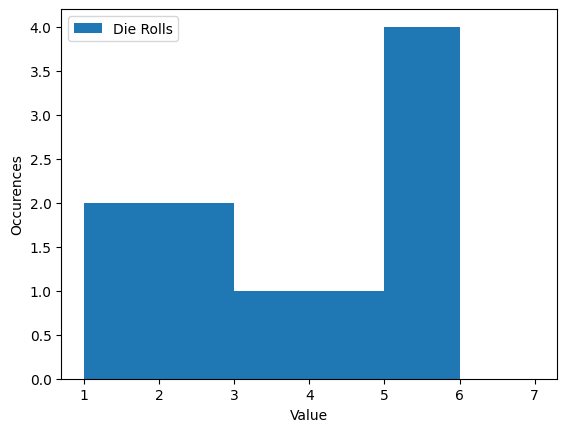

In [43]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.hist(DieRolls.draw(10), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

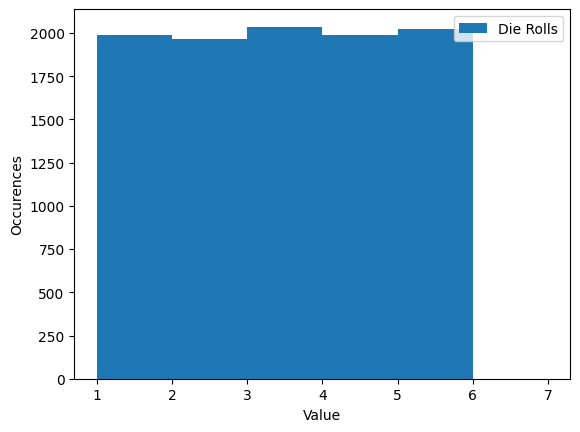

In [44]:
plt.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

## Binomial Distribution

In [45]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self,numberOfTrials = 10,probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self,numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials,self.probabilityOfSuccess,numberOfSamples)
        return samples

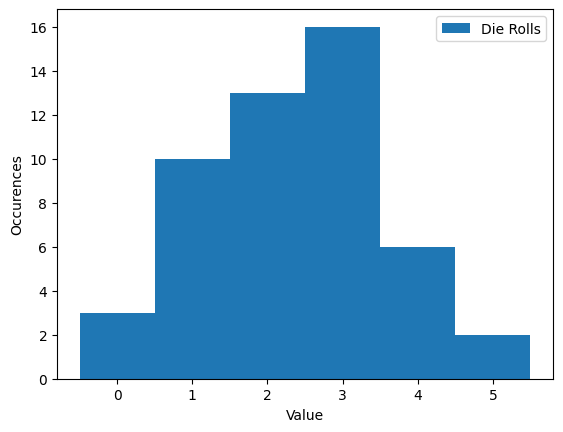

In [69]:
StockProbabilities = BinomialRandomVariable(5,0.50)
plt.hist(StockProbabilities.draw(50),bins=[0,1,2,3,4,5,6],align='left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

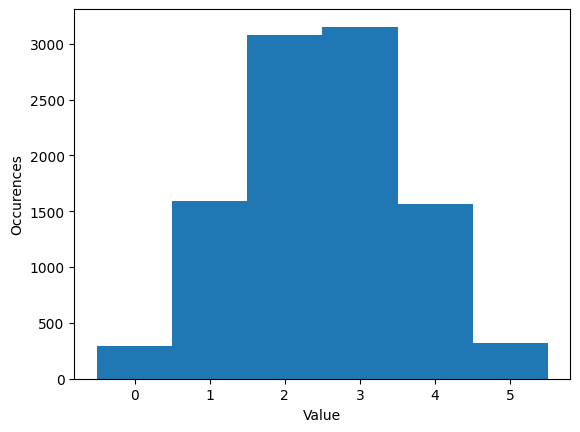

In [47]:
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

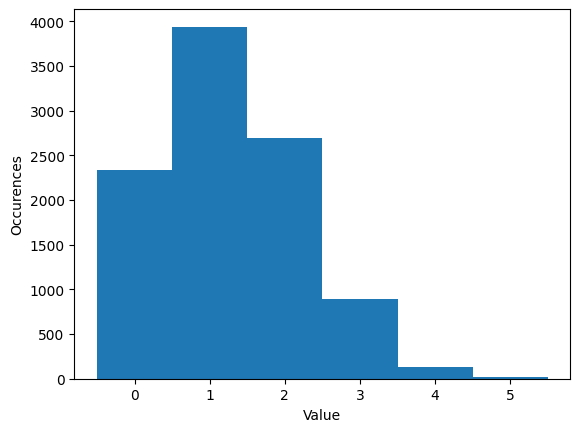

In [48]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

# Continuous Random Variables

In [49]:
class ContinuousRandomVariable:
    def __init__(self,a=0,b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self,numberOfSamples):
        samples = np.random.uniform(self.low,self.high,numberOfSamples)
        return samples

Text(0, 0.5, 'Probability')

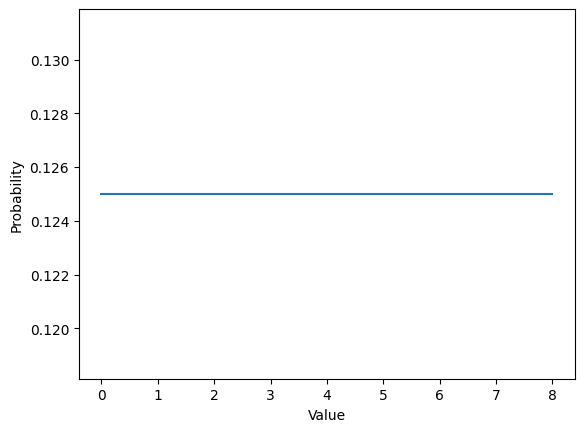

In [50]:
a=0.0
b=8.0
x=np.linspace(a,b,100)
y=[1/(b-a) for i in x]
plt.plot(x,y)
plt.xlabel('Value')
plt.ylabel('Probability')

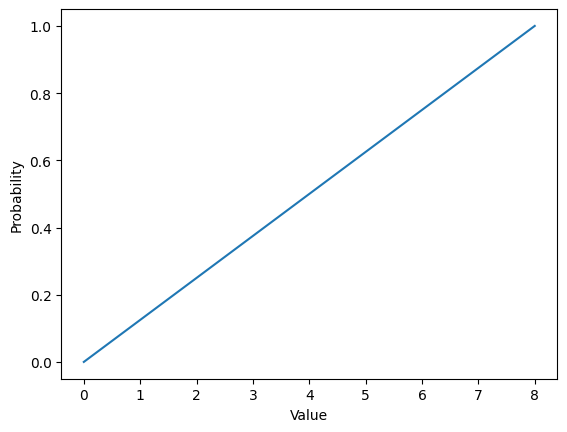

In [51]:
y= [(i-a)/(b-a) for i in x]
plt.plot(x,y)
plt.xlabel('Value')
plt.ylabel('Probability');

## Normal Distribution


In [52]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self,mean=0,varience=1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(varience)
        return
    def draw(self,numberOfSamples):
        samples = np.random.normal(self.mean,self.standardDeviation,numberOfSamples)
        return samples  

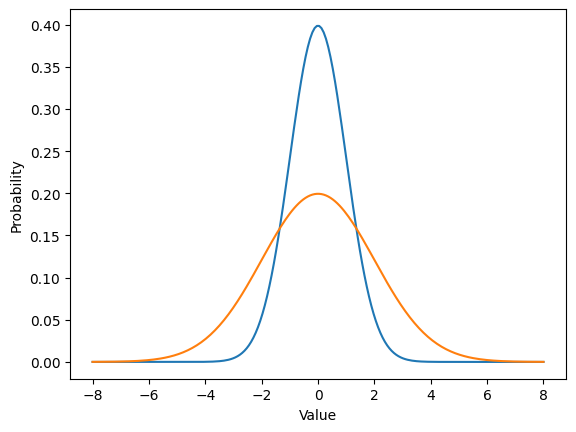

In [53]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x= np.linspace(-8,8,200)
y = (1/(sigma_1 * np.sqrt(2*3.14159))*np.exp(-(x-mu_1)*(x-mu_1)/(2*sigma_1*sigma_1)))
z = (1/(sigma_2 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_2)*(x - mu_2) / (2 * sigma_2 * sigma_2))
plt.plot(x, y, x, z)
plt.xlabel('Value')
plt.ylabel('Probability');

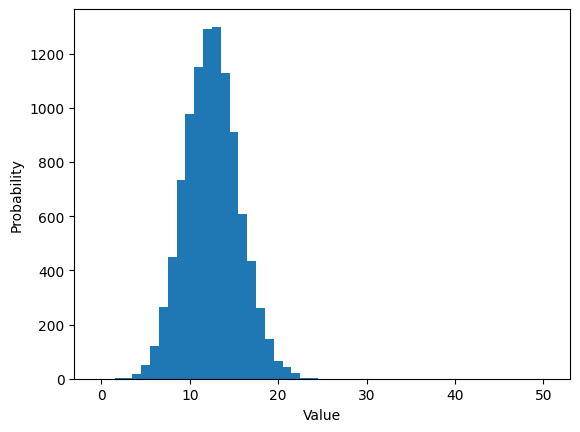

In [54]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n*p)/np.sqrt(n*p*(1-p))

plt.hist(X_samples,bins= range(0,n+2),align='left')
plt.xlabel('Value')
plt.ylabel('Probability');

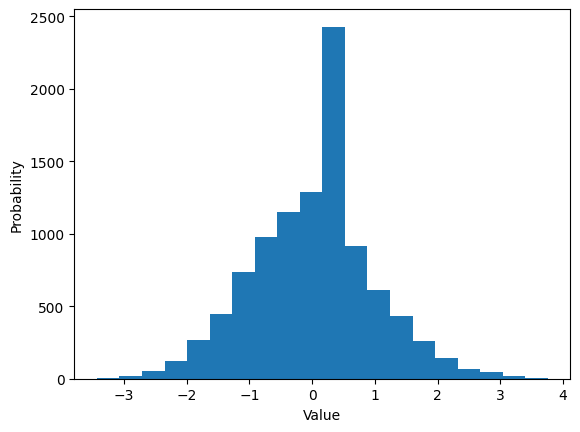

In [55]:
plt.hist(Z_samples,bins=20)
plt.xlabel('Value')
plt.ylabel('Probability');

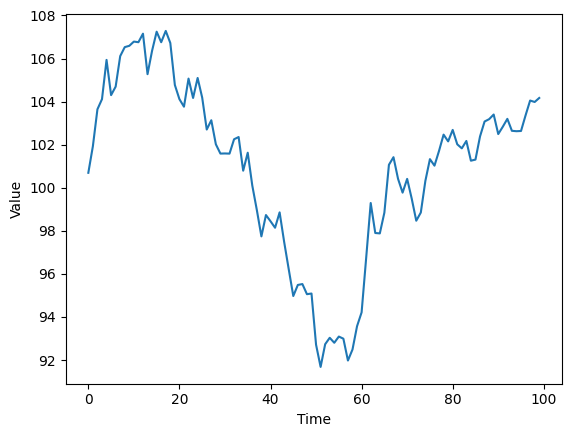

In [56]:
Y_initial = 100
X= NormalRandomVariable(0,1)
Y_returns = X.draw(100) # generate 100 daily return
Y = pd.Series(np.cumsum(Y_returns),name= 'Y')+Y_initial
Y.plot()
plt.xlabel('Time')
plt.ylabel('Value');

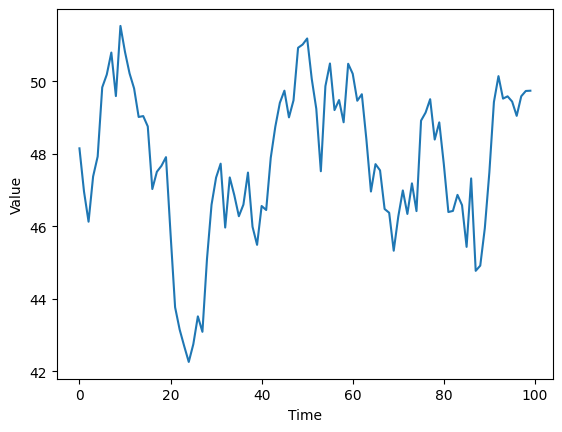

In [57]:
Z_initial = 50
Z_returns = X.draw(100)
Z = pd.Series(np.cumsum(Z_returns),name='Z')+Z_initial
Z.plot()
plt.xlabel('Time')
plt.ylabel('Value');

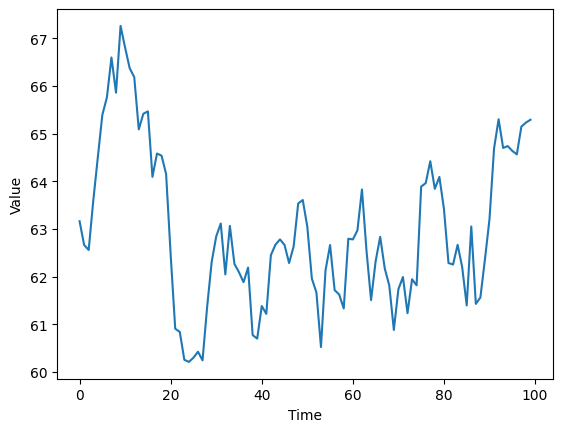

In [58]:
Y_quntity = 20
Z_quantity = 50
Y_weight = Y_quntity/(Y_quntity+ Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = 'Portfolio') + W_initial
W.plot()
plt.xlabel('Time')
plt.ylabel('Value');

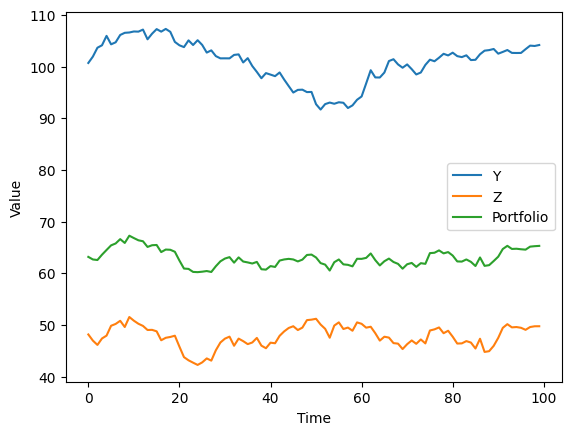

In [59]:
pd.concat([Y, Z, W], axis = 1).plot()
plt.xlabel('Time')
plt.ylabel('Value');

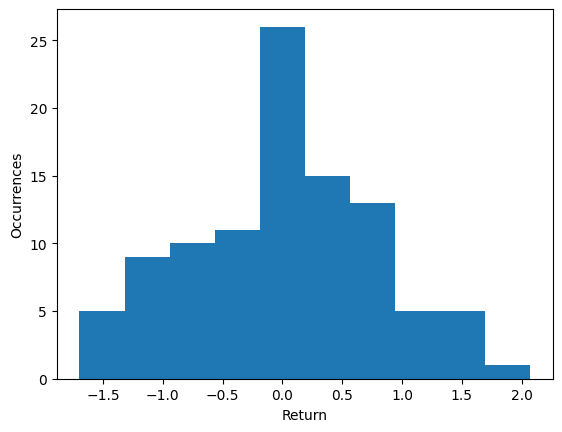

In [60]:
plt.hist(W_returns);
plt.xlabel('Return')
plt.ylabel('Occurrences');

## Fitting a Distribution


In [61]:
import yfinance as yf
start = '2015-01-01'
end = '2016-01-01'
prices = yf.download('TSLA',start=start,end=end,auto_adjust=True)['Close']['TSLA']

[*********************100%***********************]  1 of 1 completed


The JB test p-value is:  2.85516053567805e-12
We reject the hypothesis that the data are normally distributed  True
The skewness of the returns is:  0.20475398072271372
The kurtosis of the returns is:  5.217136246260784


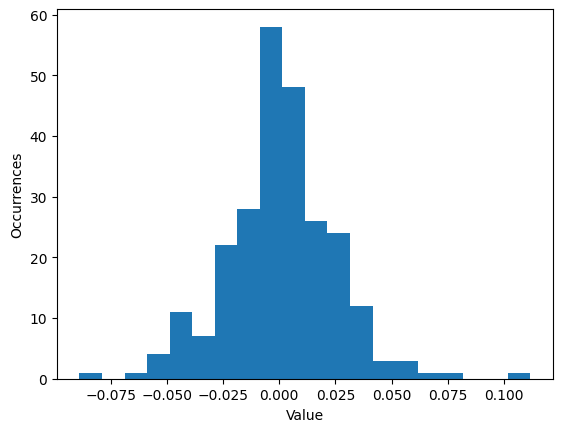

In [63]:
returns = prices.pct_change()[1:]

cutoff = 0.01

# Get the p-value of the JB test
_, p_value, skewness, kurtosis = stattools.jarque_bera(returns)
print("The JB test p-value is: ", p_value)
print("We reject the hypothesis that the data are normally distributed ", p_value < cutoff)
print("The skewness of the returns is: ", skewness)
print("The kurtosis of the returns is: ", kurtosis)
plt.hist(returns, bins = 20)
plt.xlabel('Value')
plt.ylabel('Occurrences');

In [64]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns)
sample_std_dev = np.std(returns)

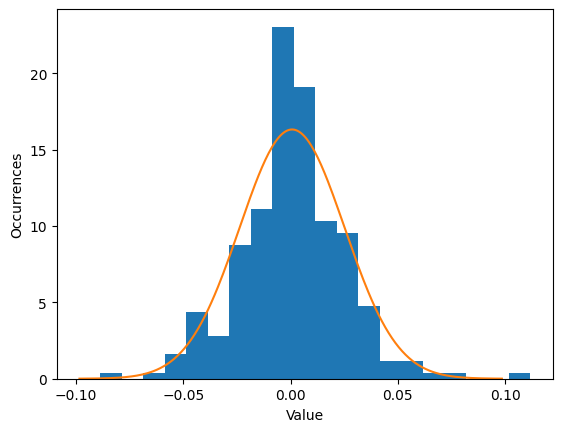

In [67]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/np.sqrt(sample_std_dev * sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.hist(returns, bins = 20, density=True);
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');